In [ ]:
from model_data_train import One_hidden_layer, generate_data_exp1, generate_data_exp2, train 
import torch as t
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import nb_neurons, nb_epochs

# Experiment 1 : Testing the limit of convergence

In [ ]:
"""
EXP1: d=100.
"""

d=100
list_n = [n for n in range(2500, 2800, 100)] + [n for n in range(2800, 3200, 50)] + [n for n in range(3200, 3500+100, 100)]
repetition=25
eps=0.05
lr=1e0

Loss_trend = []
CV_Probability = []
for n in list_n:
    p=nb_neurons(n, eps)
    epoch = nb_epochs(n, p, lr) # This value corresponds to 1.5 times the phase transition threshold.
    loss = 0.
    proba = 0.
    interaction = 0.
    for _ in range(repetition):
        model = One_hidden_layer(emb_dim=d, hid_dim=p)
        data = generate_data_exp1(d, n)
        Loss = train(model, data, lr, epoch, verbose=True)
        print(n)
        print(Loss[-1], Loss[0], p/(2*n))

        if Loss[-1] <= p/(2*n):
            loss += 0.
            proba += 1/repetition
        else:
            loss += Loss[-1]/(repetition*Loss[0])
            proba += 0.


    Loss_trend.append(loss)
    CV_Probability.append(proba)

results = {
        'n': list_n,
        'd': [d]*len(list_n),
        'loss_trend': Loss_trend,
        'CV_probability': CV_Probability,
    }
data = pd.DataFrame(results)
data.to_csv(f'raw experiments/Data_exp_1_{d}.csv', index=False)

In [ ]:
"""
EXP1.a: Regression for d=10 to 90, p varying.
"""

for d in range(10, 100, 10):
    list_n = [n for n in range(d, 25*d+d, d)]
    repetition=20
    epsilon=0.05
    lr=1e0

    Loss_trend = []
    CV_Probability = []
    for n in list_n:
        p=int(4*np.floor(np.log(n/epsilon)/np.log(4/3))+1)
        epoch = int(1.5*np.sqrt(n*p)*np.log(n*p)/(4*lr)+1) # This value corresponds to 1.5 times the phase transition threshold.
        loss = 0.
        proba = 0.
        interaction = 0.
        for _ in range(repetition):
            model = One_hidden_layer(emb_dim=d, hid_dim=p)
            data = generate_data_exp1(d, n)
            Loss = train(model, data, lr, epoch, verbose=False)
            print(n)

            initial_loss = p*t.sum(data[1]**2)/(2*n)

            if Loss[-1] <= p/(2*n):
                loss += 0.
                proba += 1/repetition
            else:
                loss += Loss[-1]/(repetition*initial_loss)
                proba += 0.

        Loss_trend.append(loss.item())
        CV_Probability.append(proba)

    results = {
        'n': list_n,
        'd': [d]*len(list_n),
        'loss_trend': Loss_trend,
        'CV_probability': CV_Probability,
    }
    data = pd.DataFrame(results)
    data.to_csv(f'raw experiments/Data_exp_1_{d}.csv', index=False)

    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))

    ax[0].plot(list_n, CV_Probability, c='k')
    ax[0].set_ylabel("Probability to reach 0")
    ax[0].set_xlabel("Dataset size")

    ax[1].plot(list_n, Loss_trend, c='k')
    ax[1].set_ylabel("Percentage of remaining loss")
    ax[1].set_xlabel("Dataset size")

    fig.suptitle(f"Likelihood of global convergence in dimension {d}.")
    plt.show()

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90


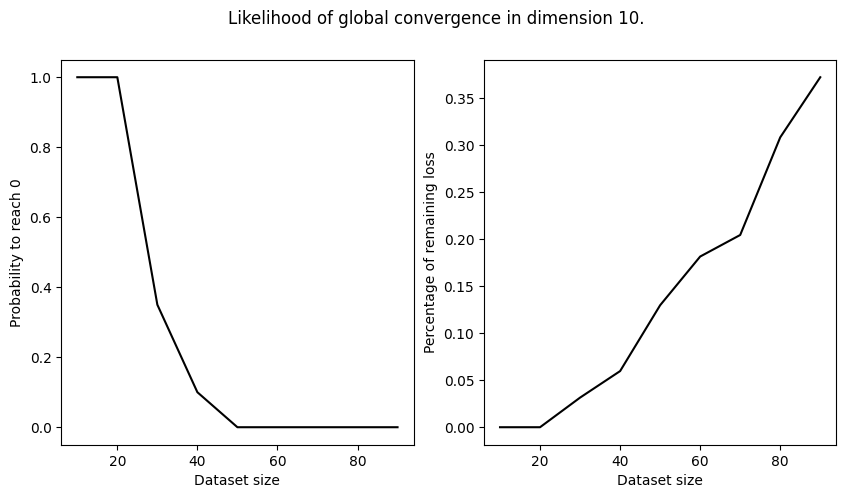

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260


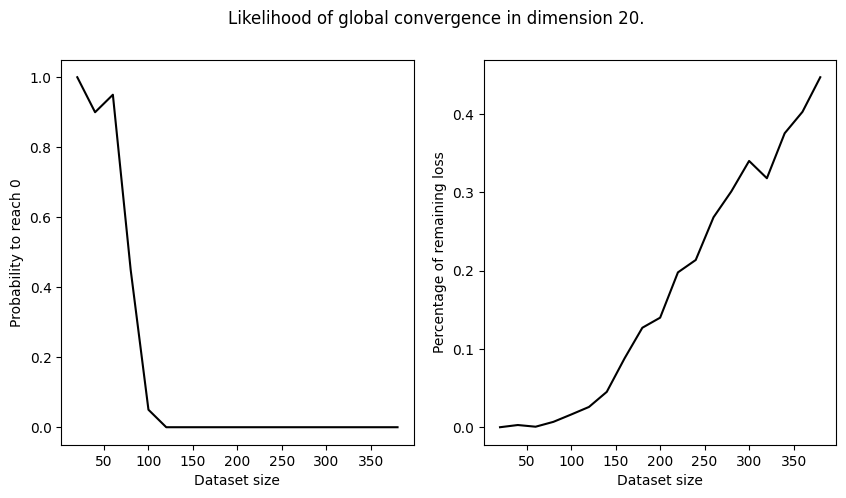

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
390
390
390
390
390
390
390
390
390
390
390
390
390
390

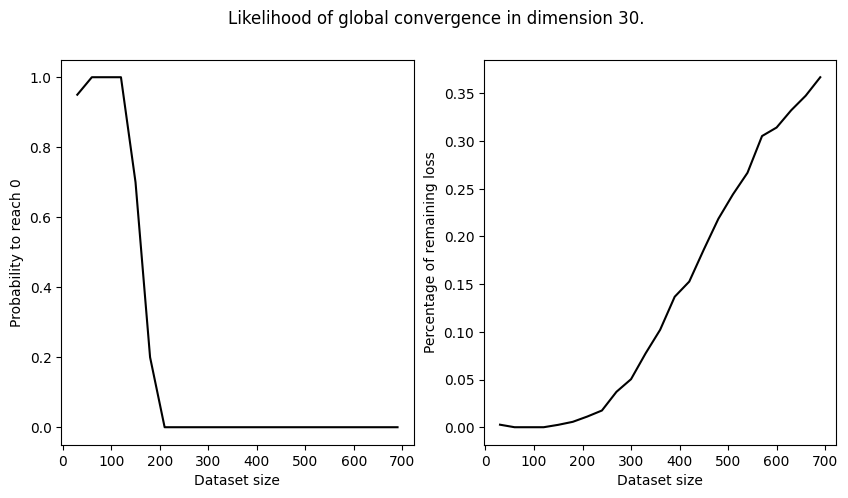

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
440
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
520
520
520
520
520
520
520
520
52

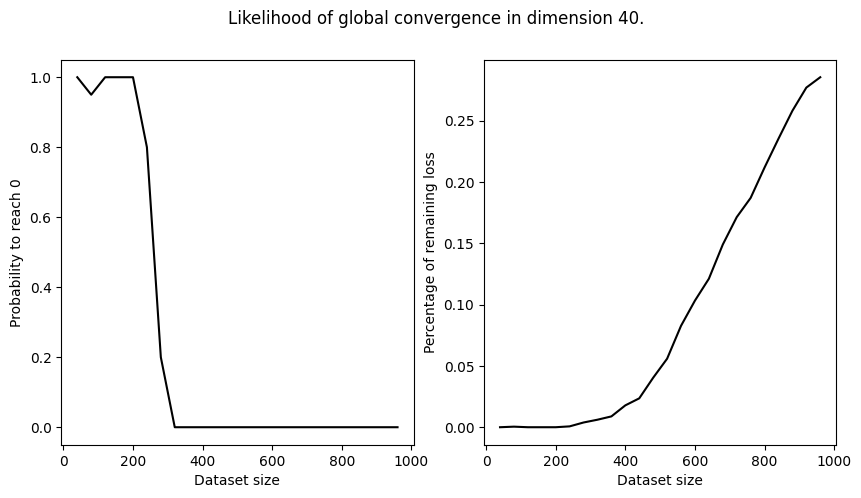

50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
250
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
550
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
650
650
650
6

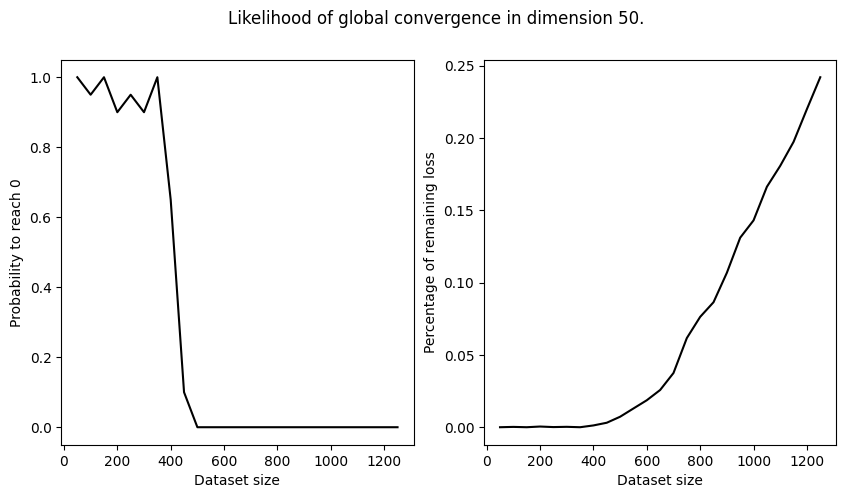

60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
120
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
660
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
780
780
780
7

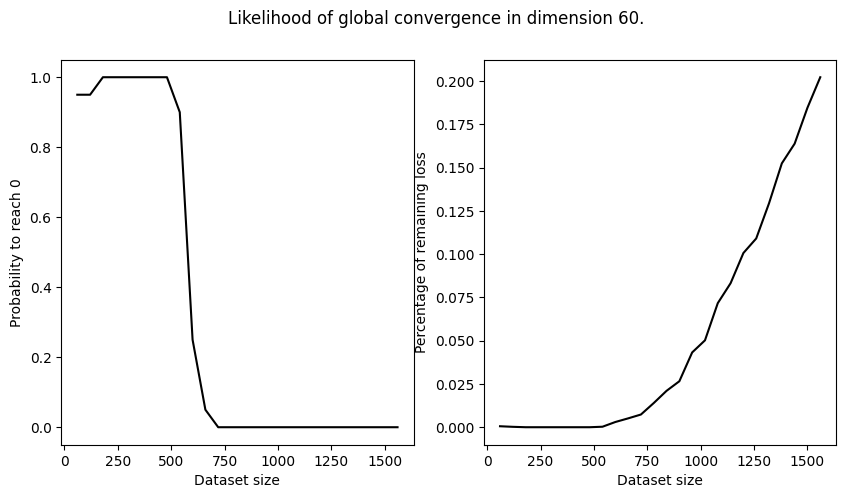

70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
140
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
210
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
280
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
420
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
490
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
770
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
840
910
910
910
9

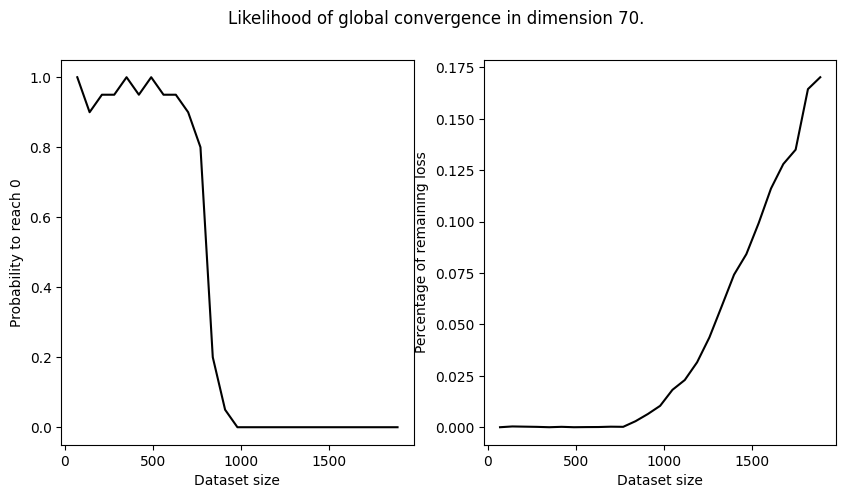

80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
160
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
480
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
560
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
880
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
960
1040
1040
104

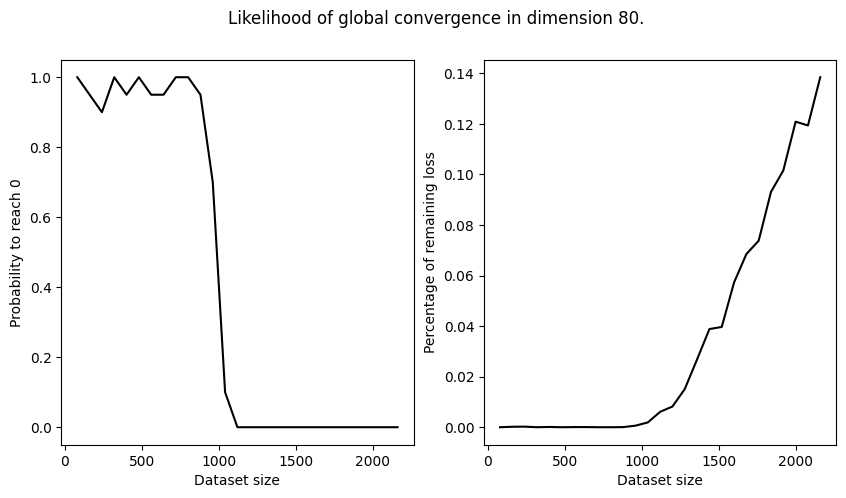

90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
90
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
270
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
630
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
720
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
810
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
990
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
1080
10

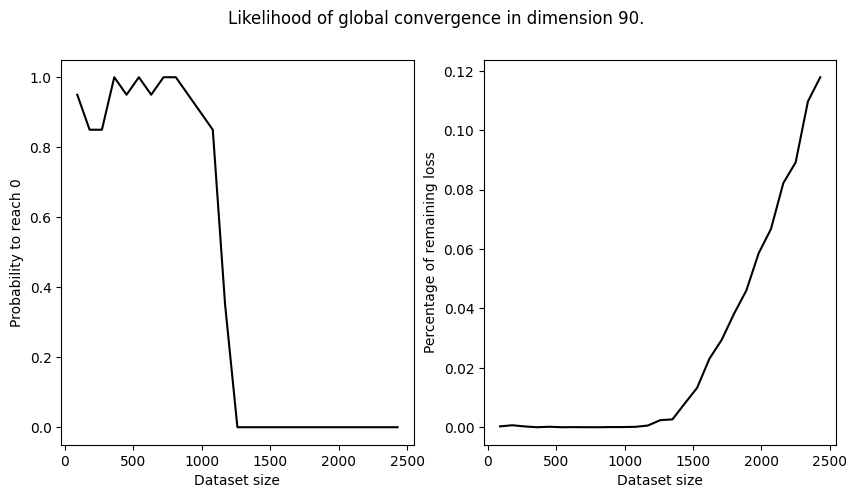

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
500
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
700
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
800
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
900
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1100
1200
1200
1200
1200
1200
1200
1200

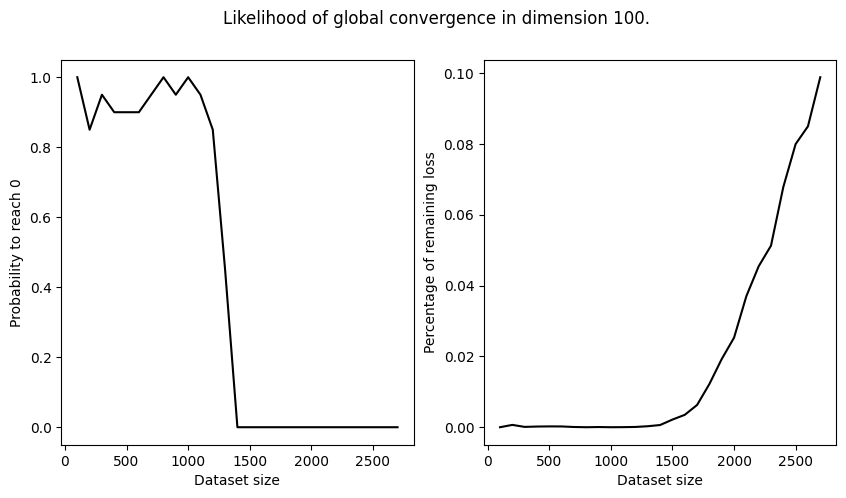

In [ ]:
"""
EXP1.b: Regression for d=10 to 100, p fixed.
"""

eps=0.05
d_max = 100
n_max = 25*d_max
p=30
repetition=20
lr=1e0

for d in range(10, d_max+10, 10):
    mean_n = 15*d-200
    var_n = 15*d
    list_n = [n for n in range(max(mean_n-var_n, d), mean_n+var_n, d)]

    Loss_trend = []
    CV_Probability = []
    for n in list_n:
        print(n)
        epoch = nb_epochs(n, p, lr) # This value corresponds to 1.5 times the phase transition threshold.
        loss = 0.
        proba = 0.
        interaction = 0.
        for _ in range(repetition):
            model = One_hidden_layer(emb_dim=d, hid_dim=p)
            data = generate_data_exp1(d, n)
            Loss = train(model, data, lr, epoch, verbose=False)
            print(n)

            initial_loss = p*t.sum(data[1]**2)/(2*n)

            if Loss[-1] <= p/(2*n):
                loss += 0.
                proba += 1/repetition
            else:
                loss += Loss[-1]/(repetition*initial_loss)
                proba += 0.

        Loss_trend.append(loss)
        CV_Probability.append(proba)

    results = {
        'n': list_n,
        'p': [p]*len(list_n),
        'd': [d]*len(list_n),
        'loss_trend': Loss_trend,
        'CV_probability': CV_Probability,
    }
    data = pd.DataFrame(results)
    data.to_csv(f'raw experiments/Data_exp_1_d_{d}.csv', index=False)

    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))

    ax[0].plot(list_n, CV_Probability, c='k')
    ax[0].set_ylabel("Probability to reach 0")
    ax[0].set_xlabel("Dataset size")

    ax[1].plot(list_n, Loss_trend, c='k')
    ax[1].set_ylabel("Percentage of remaining loss")
    ax[1].set_xlabel("Dataset size")

    fig.suptitle(f"Likelihood of global convergence in dimension {d}.")
    plt.show()

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
420
420
420
420
420
420
420
420
420
420


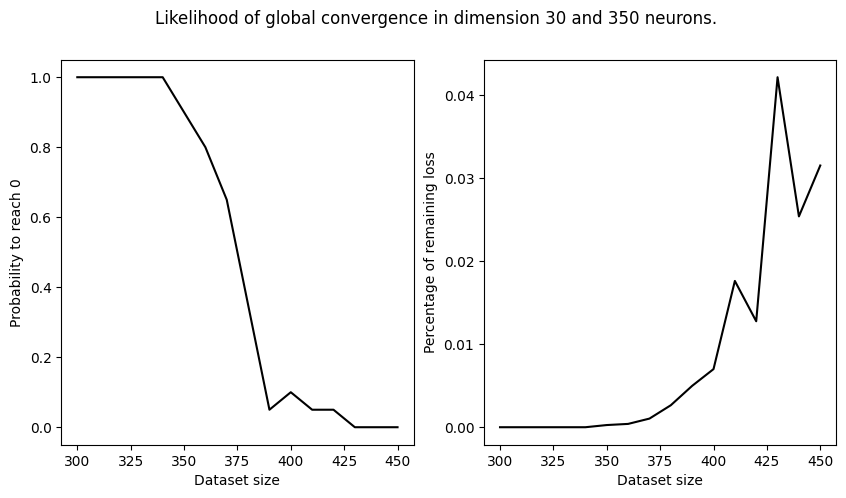

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
420
420
420
420
420
420
420
420
420
420


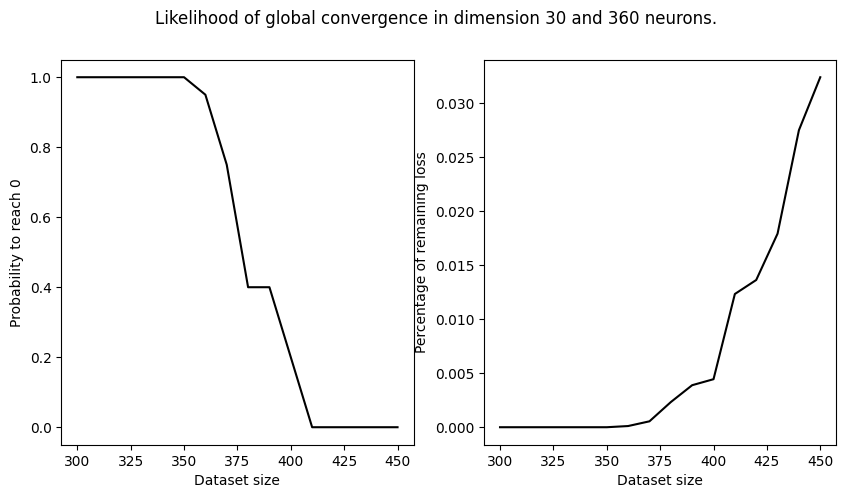

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
420
420
420
420
420
420
420
420
420
420


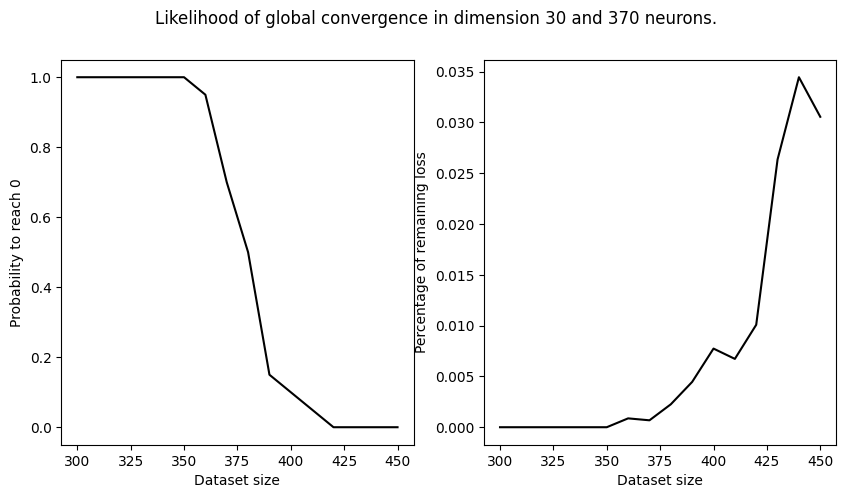

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
420
420
420
420
420
420
420
420
420
420


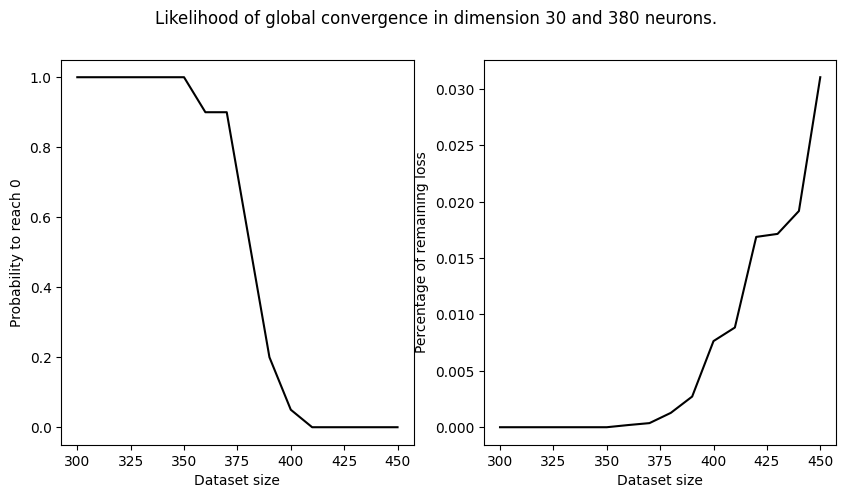

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
420
420
420
420
420
420
420
420
420
420


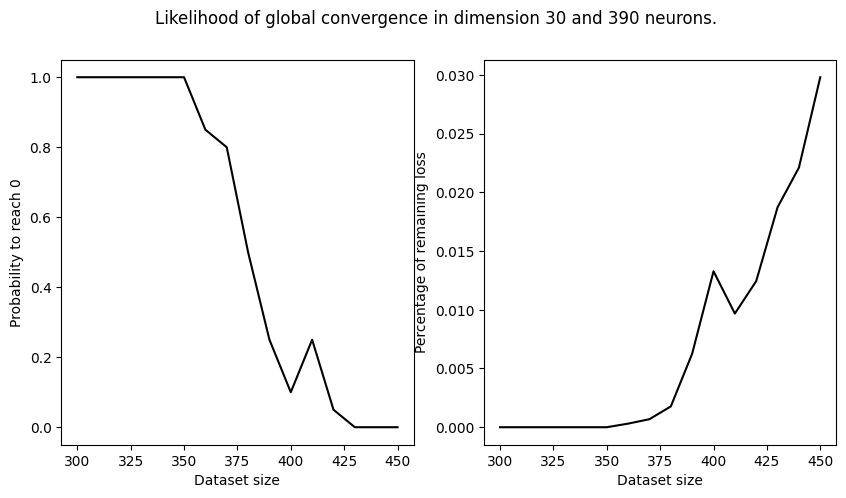

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
310
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
320
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
330
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
360
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
370
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
380
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
390
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
410
420
420
420
420
420
420
420
420
420
420


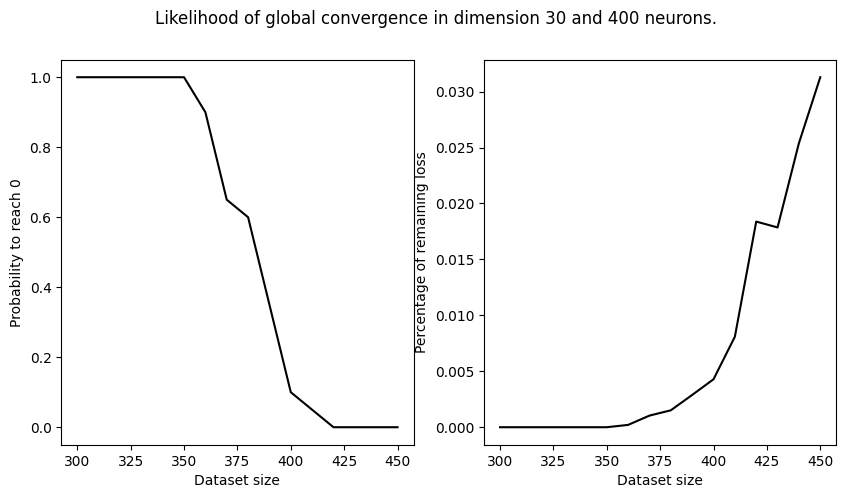

In [ ]:
"""
EXP1.c: Regression for d=30, p=50 to 400.
"""
d=30
repetition=20
lr=1e0 
for p in range(350, 400+10, 10):
    list_n = [n for n in range(300, 450+10, 10)]

    Loss_trend = []
    CV_Probability = []
    for n in list_n:
        epoch = nb_epochs(n, p, lr)
        loss = 0.
        proba = 0.
        interaction = 0.
        for _ in range(repetition):
            model = One_hidden_layer(emb_dim=d, hid_dim=p)
            data = generate_data_exp1(d, n)
            Loss = train(model, data, lr, epoch, verbose=False)
            print(n)

            initial_loss = p*t.sum(data[1]**2)/(2*n)

            if Loss[-1] <= p/(2*n):
                loss += 0.
                proba += 1/repetition
            else:
                loss += Loss[-1]/(repetition*initial_loss)
                proba += 0.

        Loss_trend.append(loss)
        CV_Probability.append(proba)

    results = {
        'n': list_n,
        'd': [d]*len(list_n),
        'p': [p]*len(list_n),
        'loss_trend': Loss_trend,
        'CV_probability': CV_Probability,
    }
    data = pd.DataFrame(results)
    data.to_csv(f'raw experiments/Data_exp_1_p_{p}.csv', index=False)

    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))

    ax[0].plot(list_n, CV_Probability, c='k')
    ax[0].set_ylabel("Probability to reach 0")
    ax[0].set_xlabel("Dataset size")

    ax[1].plot(list_n, Loss_trend, c='k')
    ax[1].set_ylabel("Percentage of remaining loss")
    ax[1].set_xlabel("Dataset size")

    fig.suptitle(f"Likelihood of global convergence in dimension {d} and {p} neurons.")
    plt.show()

# Experiment 2 : Testing the convergence speed conjecture

In [ ]:
"""
EXP2
"""

d=2000
min_n = 1000
max_n = 2000
step_n = 100
list_n = [n for n in range(min_n, max_n+step_n, step_n)]
repetition=25
epsilon=0.05
lr=1e0

log_Speed = []
log_avg_Speed = []
log_Lower = []
log_Upper = []
for n in list_n:
    p=nb_neurons(n, eps)
    epoch=nb_epochs(n, p, lr) # This value corresponds to 3 times the phase transition threshold.
    
    speed = 0.
    avg_speed = 0.
    lower = 0.
    upper = 0.
    for _ in range(repetition):
        flag = True
        while flag: # To assure a well initialized network.
            model = One_hidden_layer(emb_dim=d, hid_dim=p)
            data = generate_data_exp2(d, n)
            if model.is_well_init(data):
                Loss = train(model, data, lr, epoch, cv_threshold=1e-6)
                flag =  False
        print(n)

        window = 100
        mu = np.mean(np.log(np.array(Loss[-2-window:-2])/np.array(Loss[-1-window:-1])+1e-10)/(1*lr))
        speed += mu/repetition # Instantaneous speed at the last epoch.

        mu_inf = np.log(Loss[0]/Loss[-1])/(len(Loss)*lr)
        avg_speed += mu_inf/repetition # Average Speed at the end of the dynamic.

        indicator_matrix = (model.computations[0](data[0]) > 0).to(t.float)
        square_a_j = (model.computations[2].weight**2).squeeze()
        energies = indicator_matrix@square_a_j/p
        max_energy = energies.max()*16/(n)
        min_energy = energies.min()*2/(n)
        lower += min_energy.item()/repetition # The lower bound is measured at the last epoch.
        upper += max_energy.item()/repetition # The upper bound is measured at the last epoch.

    log_Speed.append(np.log(speed+1e-10))
    log_avg_Speed.append(np.log(avg_speed+1e-10))
    log_Lower.append(np.log(lower+1e-10))
    log_Upper.append(np.log(upper+1e-10))

results = {
        'n': list_n,
        'd': [d]*len(list_n),
        'log_speed': log_Speed,
        'log_avg_speed': log_avg_Speed,
        'log_lower': log_Lower,
        'log_upper': log_Upper,
    }
data = pd.DataFrame(results)
data.to_csv(f'raw experiments/Data_exp_2_log.csv', index=False)

 45%|████▍     | 733/1642 [00:01<00:01, 610.81it/s]


1000


 48%|████▊     | 794/1642 [00:01<00:01, 615.70it/s]


1000


 46%|████▌     | 753/1642 [00:01<00:01, 594.29it/s]


1000


 50%|████▉     | 813/1642 [00:01<00:01, 595.63it/s]


1000


 49%|████▊     | 799/1642 [00:01<00:01, 571.03it/s]


1000


 49%|████▉     | 807/1642 [00:01<00:01, 636.80it/s]


1000


 42%|████▏     | 682/1642 [00:01<00:01, 633.05it/s]


1000


 44%|████▍     | 725/1642 [00:01<00:01, 596.09it/s]


1000


 48%|████▊     | 796/1642 [00:01<00:01, 622.87it/s]


1000


 46%|████▋     | 761/1642 [00:01<00:01, 663.50it/s]


1000


 43%|████▎     | 713/1642 [00:01<00:01, 614.72it/s]


1000


 43%|████▎     | 699/1642 [00:01<00:01, 644.21it/s]


1000


 48%|████▊     | 787/1642 [00:01<00:01, 649.54it/s]


1000


 43%|████▎     | 706/1642 [00:01<00:01, 662.95it/s]


1000


 42%|████▏     | 685/1642 [00:01<00:01, 674.45it/s]


1000


 43%|████▎     | 713/1642 [00:01<00:01, 638.54it/s]


1000


 38%|███▊      | 621/1642 [00:00<00:01, 642.12it/s]


1000


 38%|███▊      | 618/1642 [00:00<00:01, 666.67it/s]


1000


 40%|████      | 664/1642 [00:00<00:01, 677.72it/s]


1000


 39%|███▉      | 638/1642 [00:00<00:01, 669.32it/s]


1000


 41%|████      | 669/1642 [00:01<00:01, 636.39it/s]


1000


 43%|████▎     | 702/1642 [00:01<00:01, 666.75it/s]


1000


 41%|████      | 677/1642 [00:01<00:01, 671.37it/s]


1000


 43%|████▎     | 702/1642 [00:01<00:01, 658.88it/s]


1000


 48%|████▊     | 787/1642 [00:01<00:01, 652.55it/s]


1000


 42%|████▏     | 729/1736 [00:01<00:01, 566.27it/s]


1100


 48%|████▊     | 835/1736 [00:01<00:01, 531.85it/s]


1100


 55%|█████▌    | 962/1736 [00:01<00:01, 545.20it/s]


1100


 47%|████▋     | 808/1736 [00:01<00:01, 553.44it/s]


1100


 40%|████      | 696/1736 [00:01<00:01, 554.36it/s]


1100


 61%|██████    | 1060/1736 [00:01<00:01, 555.96it/s]


1100


 45%|████▌     | 784/1736 [00:01<00:01, 579.54it/s]


1100


 41%|████      | 712/1736 [00:01<00:01, 548.72it/s]


1100


 45%|████▍     | 777/1736 [00:01<00:01, 561.09it/s]


1100


 41%|████      | 714/1736 [00:01<00:01, 575.85it/s]


1100


 42%|████▏     | 724/1736 [00:01<00:01, 549.77it/s]


1100


 40%|████      | 700/1736 [00:01<00:01, 553.02it/s]


1100


 47%|████▋     | 814/1736 [00:01<00:01, 580.86it/s]


1100


 51%|█████▏    | 890/1736 [00:01<00:01, 556.49it/s]


1100


 42%|████▏     | 722/1736 [00:01<00:01, 576.27it/s]


1100


 48%|████▊     | 825/1736 [00:01<00:01, 563.60it/s]


1100


 43%|████▎     | 738/1736 [00:01<00:01, 554.93it/s]


1100


 45%|████▌     | 784/1736 [00:01<00:01, 576.28it/s]


1100


 47%|████▋     | 819/1736 [00:01<00:01, 580.55it/s]


1100


 42%|████▏     | 730/1736 [00:01<00:01, 541.14it/s]


1100


 43%|████▎     | 748/1736 [00:01<00:01, 572.81it/s]


1100


 47%|████▋     | 819/1736 [00:01<00:01, 587.17it/s]


1100


 49%|████▉     | 854/1736 [00:01<00:01, 562.83it/s]


1100


 47%|████▋     | 817/1736 [00:01<00:01, 560.42it/s]


1100


 52%|█████▏    | 895/1736 [00:01<00:01, 585.24it/s]


1100


 41%|████      | 762/1858 [00:01<00:02, 510.80it/s]


1200


 43%|████▎     | 808/1858 [00:01<00:02, 506.89it/s]


1200


 45%|████▍     | 829/1858 [00:01<00:02, 485.42it/s]


1200


 42%|████▏     | 778/1858 [00:01<00:02, 504.52it/s]


1200


 51%|█████▏    | 954/1858 [00:01<00:01, 510.38it/s]


1200


 49%|████▉     | 918/1858 [00:01<00:01, 506.62it/s]


1200


 41%|████      | 762/1858 [00:01<00:02, 498.72it/s]


1200


 49%|████▉     | 909/1858 [00:01<00:01, 486.19it/s]


1200


 48%|████▊     | 887/1858 [00:01<00:02, 461.58it/s]


1200


 45%|████▍     | 830/1858 [00:01<00:02, 492.51it/s]


1200


 44%|████▍     | 819/1858 [00:01<00:02, 494.79it/s]


1200


 44%|████▍     | 819/1858 [00:01<00:02, 495.44it/s]


1200


 42%|████▏     | 782/1858 [00:01<00:02, 485.64it/s]


1200


 39%|███▉      | 731/1858 [00:01<00:02, 519.36it/s]


1200


 50%|████▉     | 920/1858 [00:01<00:01, 502.10it/s]


1200


 47%|████▋     | 869/1858 [00:01<00:02, 488.67it/s]


1200


 40%|████      | 749/1858 [00:01<00:02, 510.69it/s]


1200


 49%|████▊     | 903/1858 [00:01<00:01, 511.80it/s]


1200


 43%|████▎     | 806/1858 [00:01<00:02, 478.73it/s]


1200


 45%|████▌     | 837/1858 [00:01<00:02, 481.09it/s]


1200


 48%|████▊     | 897/1858 [00:01<00:01, 508.63it/s]


1200


 39%|███▊      | 719/1858 [00:01<00:02, 478.12it/s]


1200


 43%|████▎     | 792/1858 [00:01<00:02, 502.01it/s]


1200


 42%|████▏     | 772/1858 [00:01<00:02, 513.88it/s]


1200


 40%|████      | 752/1858 [00:01<00:02, 497.41it/s]


1200


 54%|█████▎    | 1045/1946 [00:02<00:01, 455.79it/s]


1300


 40%|████      | 788/1946 [00:01<00:02, 455.99it/s]


1300


 43%|████▎     | 842/1946 [00:01<00:02, 454.70it/s]


1300


 50%|█████     | 980/1946 [00:02<00:02, 443.80it/s]


1300


 41%|████      | 797/1946 [00:01<00:02, 469.25it/s]


1300


 50%|████▉     | 967/1946 [00:02<00:02, 454.92it/s]


1300


 45%|████▌     | 882/1946 [00:01<00:02, 456.97it/s]


1300


 43%|████▎     | 845/1946 [00:01<00:02, 461.84it/s]


1300


 45%|████▌     | 884/1946 [00:01<00:02, 445.81it/s]


1300


 41%|████      | 799/1946 [00:01<00:02, 453.07it/s]


1300


 43%|████▎     | 843/1946 [00:01<00:02, 465.44it/s]


1300


 45%|████▌     | 877/1946 [00:01<00:02, 451.92it/s]


1300


 45%|████▍     | 868/1946 [00:01<00:02, 439.42it/s]


1300


 49%|████▉     | 953/1946 [00:02<00:02, 473.69it/s]


1300


 45%|████▍     | 867/1946 [00:01<00:02, 438.77it/s]


1300


 42%|████▏     | 815/1946 [00:01<00:02, 453.84it/s]


1300


 42%|████▏     | 820/1946 [00:01<00:02, 456.29it/s]


1300


 42%|████▏     | 817/1946 [00:01<00:02, 436.75it/s]


1300


 42%|████▏     | 810/1946 [00:01<00:02, 421.42it/s]


1300


 43%|████▎     | 838/1946 [00:01<00:02, 465.13it/s]


1300


 45%|████▌     | 876/1946 [00:01<00:02, 441.92it/s]


1300


 47%|████▋     | 914/1946 [00:02<00:02, 442.26it/s]


1300


 41%|████      | 791/1946 [00:01<00:02, 457.44it/s]


1300


 39%|███▊      | 754/1946 [00:01<00:02, 455.44it/s]


1300


 47%|████▋     | 914/1946 [00:02<00:02, 448.19it/s]


1300


 47%|████▋     | 947/2032 [00:02<00:02, 389.11it/s]


1400


 43%|████▎     | 879/2032 [00:02<00:03, 381.25it/s]


1400


 40%|███▉      | 803/2032 [00:02<00:03, 384.58it/s]


1400


 42%|████▏     | 854/2032 [00:02<00:03, 370.25it/s]


1400


 45%|████▍     | 908/2032 [00:02<00:02, 409.14it/s]


1400


 43%|████▎     | 873/2032 [00:02<00:02, 402.69it/s]


1400


 52%|█████▏    | 1049/2032 [00:02<00:02, 416.26it/s]


1400


 42%|████▏     | 858/2032 [00:02<00:02, 404.30it/s]


1400


 47%|████▋     | 953/2032 [00:02<00:02, 410.60it/s]


1400


 45%|████▍     | 906/2032 [00:02<00:02, 406.74it/s]


1400


 44%|████▍     | 901/2032 [00:02<00:02, 405.44it/s]


1400


 43%|████▎     | 883/2032 [00:02<00:02, 404.21it/s]


1400


 45%|████▍     | 908/2032 [00:02<00:02, 401.39it/s]


1400


 44%|████▍     | 889/2032 [00:02<00:02, 386.04it/s]


1400


 44%|████▍     | 897/2032 [00:02<00:02, 388.89it/s]


1400


 50%|█████     | 1021/2032 [00:02<00:02, 419.65it/s]


1400


 52%|█████▏    | 1061/2032 [00:02<00:02, 403.21it/s]


1400


 49%|████▊     | 989/2032 [00:02<00:02, 407.22it/s]


1400


 44%|████▍     | 904/2032 [00:02<00:02, 421.76it/s]


1400


 45%|████▌     | 922/2032 [00:02<00:02, 399.12it/s]


1400


 43%|████▎     | 879/2032 [00:02<00:02, 418.57it/s]


1400


 40%|████      | 820/2032 [00:01<00:02, 417.08it/s]


1400


 42%|████▏     | 859/2032 [00:02<00:02, 399.87it/s]


1400


 40%|████      | 816/2032 [00:01<00:02, 417.83it/s]


1400


 40%|████      | 822/2032 [00:01<00:02, 419.74it/s]


1400


 42%|████▏     | 878/2115 [00:02<00:03, 357.85it/s]


1500


 41%|████      | 869/2115 [00:02<00:03, 376.84it/s]


1500


 44%|████▍     | 940/2115 [00:02<00:03, 373.81it/s]


1500


 47%|████▋     | 991/2115 [00:02<00:03, 362.65it/s]


1500


 40%|████      | 848/2115 [00:02<00:03, 374.69it/s]


1500


 43%|████▎     | 909/2115 [00:02<00:03, 361.05it/s]


1500


 43%|████▎     | 903/2115 [00:02<00:03, 367.09it/s]


1500


 44%|████▍     | 935/2115 [00:02<00:03, 370.75it/s]


1500


 46%|████▌     | 970/2115 [00:03<00:04, 284.40it/s]


1500


 51%|█████     | 1081/2115 [00:03<00:03, 326.90it/s]


1500


 40%|███▉      | 844/2115 [00:02<00:03, 351.46it/s]


1500


 53%|█████▎    | 1111/2115 [00:03<00:03, 333.97it/s]


1500


 43%|████▎     | 902/2115 [00:02<00:03, 314.48it/s]


1500


 46%|████▋     | 981/2115 [00:02<00:03, 358.39it/s]


1500


 52%|█████▏    | 1101/2115 [00:03<00:03, 337.89it/s]


1500


 49%|████▉     | 1035/2115 [00:03<00:03, 329.96it/s]


1500


 41%|████      | 868/2115 [00:03<00:04, 278.00it/s]


1500


 53%|█████▎    | 1119/2115 [00:03<00:03, 293.75it/s]


1500


 52%|█████▏    | 1090/2115 [00:03<00:03, 329.18it/s]


1500


 44%|████▎     | 924/2115 [00:02<00:03, 316.19it/s]


1500


 39%|███▉      | 829/2115 [00:02<00:03, 338.20it/s]


1500


 44%|████▍     | 935/2115 [00:02<00:03, 365.01it/s]


1500


 44%|████▎     | 923/2115 [00:02<00:03, 373.96it/s]


1500


 41%|████      | 869/2115 [00:02<00:03, 362.43it/s]


1500


 58%|█████▊    | 1230/2115 [00:03<00:02, 365.96it/s]


1500


 40%|████      | 902/2232 [00:02<00:04, 315.15it/s]


1600


 40%|███▉      | 887/2232 [00:02<00:04, 327.32it/s]


1600


 47%|████▋     | 1042/2232 [00:03<00:03, 318.66it/s]


1600


 51%|█████     | 1142/2232 [00:03<00:03, 326.88it/s]


1600


 43%|████▎     | 961/2232 [00:02<00:03, 320.60it/s]


1600


 40%|████      | 895/2232 [00:02<00:04, 317.89it/s]


1600


 46%|████▌     | 1026/2232 [00:03<00:03, 317.60it/s]


1600


 49%|████▊     | 1087/2232 [00:03<00:03, 317.70it/s]


1600


 40%|███▉      | 882/2232 [00:02<00:04, 296.89it/s]


1600


 41%|████      | 916/2232 [00:02<00:04, 316.56it/s]


1600


 39%|███▉      | 866/2232 [00:02<00:04, 312.81it/s]


1600


 44%|████▍     | 980/2232 [00:03<00:03, 317.86it/s]


1600


 48%|████▊     | 1077/2232 [00:03<00:03, 320.22it/s]


1600


 44%|████▍     | 991/2232 [00:03<00:03, 322.84it/s]


1600


 43%|████▎     | 951/2232 [00:03<00:04, 299.97it/s]


1600


 42%|████▏     | 932/2232 [00:02<00:04, 316.84it/s]


1600


 40%|████      | 902/2232 [00:02<00:04, 325.73it/s]


1600


 41%|████      | 917/2232 [00:02<00:04, 313.62it/s]


1600


 41%|████      | 914/2232 [00:02<00:04, 327.20it/s]


1600


 42%|████▏     | 932/2232 [00:03<00:04, 284.00it/s]


1600


 41%|████      | 907/2232 [00:03<00:04, 294.48it/s]


1600


 44%|████▍     | 979/2232 [00:03<00:04, 284.04it/s]


1600


 43%|████▎     | 969/2232 [00:03<00:05, 246.06it/s]


1600


 42%|████▏     | 931/2232 [00:03<00:04, 306.30it/s]


1600


 39%|███▉      | 873/2232 [00:02<00:04, 325.74it/s]


1600


 43%|████▎     | 994/2312 [00:03<00:04, 289.52it/s]


1700


 39%|███▉      | 903/2312 [00:03<00:05, 268.19it/s]


1700


 40%|████      | 934/2312 [00:03<00:05, 253.54it/s]


1700


 46%|████▌     | 1065/2312 [00:04<00:04, 253.03it/s]


1700


 45%|████▍     | 1039/2312 [00:04<00:05, 240.76it/s]


1700


 42%|████▏     | 965/2312 [00:04<00:06, 213.32it/s]


1700


 39%|███▉      | 896/2312 [00:04<00:06, 211.91it/s]


1700


 40%|███▉      | 922/2312 [00:03<00:05, 238.17it/s]


1700


 50%|████▉     | 1148/2312 [00:04<00:04, 280.76it/s]


1700


 39%|███▊      | 894/2312 [00:04<00:06, 205.84it/s]


1700


 40%|███▉      | 921/2312 [00:04<00:06, 217.22it/s]


1700


 51%|█████▏    | 1188/2312 [00:04<00:04, 239.93it/s]


1700


 38%|███▊      | 884/2312 [00:03<00:05, 271.31it/s]


1700


 40%|███▉      | 918/2312 [00:03<00:06, 230.49it/s]


1700


 40%|███▉      | 916/2312 [00:03<00:05, 257.57it/s]


1700


 41%|████      | 949/2312 [00:03<00:05, 239.36it/s]


1700


 46%|████▋     | 1071/2312 [00:04<00:05, 243.21it/s]


1700


 42%|████▏     | 964/2312 [00:03<00:04, 279.04it/s]


1700


 43%|████▎     | 993/2312 [00:03<00:04, 280.24it/s]


1700


 44%|████▍     | 1021/2312 [00:04<00:05, 251.15it/s]


1700


 42%|████▏     | 963/2312 [00:03<00:05, 250.12it/s]


1700


 45%|████▌     | 1041/2312 [00:04<00:04, 257.87it/s]


1700


 40%|████      | 926/2312 [00:03<00:05, 274.17it/s]


1700


 45%|████▍     | 1034/2312 [00:03<00:04, 281.80it/s]


1700


 44%|████▍     | 1017/2312 [00:03<00:04, 279.51it/s]


1700


 44%|████▍     | 1050/2390 [00:05<00:06, 204.95it/s]


1800


 48%|████▊     | 1157/2390 [00:04<00:05, 238.47it/s]


1800


 43%|████▎     | 1027/2390 [00:04<00:05, 255.83it/s]


1800


 43%|████▎     | 1039/2390 [00:04<00:05, 257.77it/s]


1800


 45%|████▍     | 1065/2390 [00:04<00:05, 235.82it/s]


1800


 42%|████▏     | 1002/2390 [00:03<00:05, 254.73it/s]


1800


 48%|████▊     | 1154/2390 [00:04<00:04, 256.82it/s]


1800


 44%|████▎     | 1040/2390 [00:04<00:05, 229.41it/s]


1800


 40%|███▉      | 950/2390 [00:03<00:05, 250.35it/s]


1800


 41%|████      | 981/2390 [00:04<00:06, 222.66it/s]


1800


 43%|████▎     | 1030/2390 [00:03<00:05, 258.70it/s]


1800


 43%|████▎     | 1020/2390 [00:04<00:05, 248.75it/s]


1800


 42%|████▏     | 1001/2390 [00:04<00:05, 236.21it/s]


1800


 46%|████▌     | 1101/2390 [00:04<00:05, 241.69it/s]


1800


 40%|███▉      | 946/2390 [00:03<00:05, 256.60it/s]


1800


 48%|████▊     | 1143/2390 [00:05<00:05, 226.25it/s]


1800


 42%|████▏     | 1008/2390 [00:03<00:05, 262.27it/s]


1800


 43%|████▎     | 1033/2390 [00:04<00:05, 255.95it/s]


1800


 39%|███▉      | 938/2390 [00:03<00:05, 257.67it/s]


1800


 53%|█████▎    | 1260/2390 [00:05<00:04, 229.92it/s]


1800


 44%|████▍     | 1060/2390 [00:04<00:05, 248.99it/s]


1800


 43%|████▎     | 1031/2390 [00:04<00:05, 253.24it/s]


1800


 43%|████▎     | 1036/2390 [00:04<00:06, 220.90it/s]


1800


 40%|███▉      | 952/2390 [00:03<00:05, 245.21it/s]


1800


 43%|████▎     | 1028/2390 [00:03<00:05, 257.76it/s]


1800


 45%|████▌     | 1121/2466 [00:05<00:06, 200.82it/s]


1900


 38%|███▊      | 940/2466 [00:04<00:06, 229.64it/s]


1900


 39%|███▊      | 953/2466 [00:04<00:06, 229.06it/s]


1900


 40%|████      | 988/2466 [00:04<00:06, 213.80it/s]


1900


 56%|█████▌    | 1382/2466 [00:05<00:04, 235.88it/s]


1900


 42%|████▏     | 1027/2466 [00:04<00:06, 206.85it/s]


1900


 44%|████▍     | 1084/2466 [00:05<00:07, 181.52it/s]


1900


 44%|████▍     | 1086/2466 [00:05<00:06, 214.73it/s]


1900


 52%|█████▏    | 1282/2466 [00:06<00:05, 213.12it/s]


1900


 41%|████      | 1016/2466 [00:04<00:07, 203.60it/s]


1900


 43%|████▎     | 1055/2466 [00:04<00:06, 212.21it/s]


1900


 42%|████▏     | 1033/2466 [00:04<00:06, 218.38it/s]


1900


 67%|██████▋   | 1648/2466 [00:07<00:03, 208.67it/s]


1900


 51%|█████     | 1251/2466 [00:05<00:05, 212.76it/s]


1900


 38%|███▊      | 940/2466 [00:04<00:07, 195.62it/s]


1900


 42%|████▏     | 1033/2466 [00:06<00:08, 163.80it/s]


1900


 53%|█████▎    | 1299/2466 [00:06<00:06, 191.73it/s]


1900


 49%|████▉     | 1217/2466 [00:05<00:05, 225.25it/s]


1900


 40%|████      | 995/2466 [00:04<00:06, 240.38it/s]


1900


 42%|████▏     | 1027/2466 [00:04<00:05, 242.03it/s]


1900


 40%|███▉      | 986/2466 [00:04<00:06, 223.45it/s]


1900


 48%|████▊     | 1182/2466 [00:05<00:05, 234.23it/s]


1900


 56%|█████▌    | 1373/2466 [00:05<00:04, 230.14it/s]


1900


 53%|█████▎    | 1300/2466 [00:06<00:05, 204.39it/s]


1900


 46%|████▋     | 1146/2466 [00:05<00:06, 214.48it/s]


1900


 42%|████▏     | 1071/2540 [00:04<00:05, 255.43it/s]


2000


 37%|███▋      | 945/2540 [00:03<00:05, 291.90it/s]


2000


 43%|████▎     | 1081/2540 [00:03<00:05, 291.48it/s]


2000


 39%|███▉      | 997/2540 [00:03<00:05, 296.09it/s]


2000


 48%|████▊     | 1228/2540 [00:04<00:04, 289.31it/s]


2000


 43%|████▎     | 1080/2540 [00:03<00:04, 294.28it/s]


2000


 42%|████▏     | 1059/2540 [00:03<00:05, 289.89it/s]


2000


 49%|████▉     | 1246/2540 [00:04<00:04, 297.13it/s]


2000


 44%|████▍     | 1115/2540 [00:03<00:04, 293.71it/s]


2000


 42%|████▏     | 1069/2540 [00:03<00:05, 292.23it/s]


2000


 39%|███▉      | 985/2540 [00:03<00:05, 291.64it/s]


2000


 51%|█████▏    | 1303/2540 [00:04<00:04, 291.17it/s]


2000


 41%|████      | 1030/2540 [00:03<00:05, 291.18it/s]


2000


 51%|█████▏    | 1306/2540 [00:04<00:04, 297.66it/s]


2000


 46%|████▌     | 1164/2540 [00:04<00:04, 288.37it/s]


2000


 44%|████▎     | 1109/2540 [00:03<00:04, 292.08it/s]


2000


 51%|█████     | 1285/2540 [00:04<00:04, 277.62it/s]


2000


 37%|███▋      | 948/2540 [00:03<00:05, 291.51it/s]


2000


 44%|████▍     | 1123/2540 [00:03<00:04, 298.05it/s]


2000


 40%|████      | 1028/2540 [00:03<00:05, 288.30it/s]


2000


 39%|███▉      | 991/2540 [00:03<00:05, 297.49it/s]


2000


 41%|████▏     | 1049/2540 [00:03<00:05, 290.02it/s]


2000


 41%|████      | 1037/2540 [00:03<00:05, 295.03it/s]


2000


 37%|███▋      | 942/2540 [00:03<00:05, 288.11it/s]


2000


 45%|████▍     | 1135/2540 [00:03<00:04, 296.97it/s]

2000
